toujours laisser ce fichier propre en fin de trvaille

In [132]:
import ccxt, pandas as pd, matplotlib.pyplot as plt, sys, indicateur_techniques as ind, yfinance as yf
sys.path.append('../Ohlcvplus')
from ohlcv import OhlcvPlus
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [127]:
#load data
data = pd.read_csv('data_btc.csv').head(100)
data.timestamp = pd.to_datetime(data.timestamp, unit='ms').apply(mdates.date2num)

In [177]:
def graphique(*args, interval=5, width_bougie=0.0002):
    df = data[['timestamp', 'open', 'high', 'low', 'close']]
    plt.close()
    
    def joli():
        plt.xticks(rotation=45, ha='right')
        plt.style.use('dark_background')
        plt.rcParams['font.size'] = 5
    
    if len(args) > 1:
        fig, axs = plt.subplots(len(args), figsize=(5, 2 * len(args)), dpi=200)

        candlestick_ohlc(axs[0], df.values, colorup='g', colordown='r', width=width_bougie, alpha=0.9)
        
        for ax in axs:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.tick_params(axis='both', which='both', length=0)
            ax.set_axisbelow(True)
            ax.grid(axis='y', color='#073244', alpha=0.5)
            ax.grid(axis='x', color='#073244', alpha=0.2)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M'))
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
        
        for i in range(len(args)):
            for ind in args[i]:
                axs[i].plot(df['timestamp'], ind[0], linewidth=ind[1], color=ind[2], alpha=ind[3])
        
        joli()
        plt.subplots_adjust(wspace=0, hspace=0.5)
    
    elif len(args) == 1:
        fig, ax = plt.subplots(figsize=(5, 2), dpi=200)
        
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M'))
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
        
        candlestick_ohlc(ax, df.values, colorup='g', colordown='r', width=width_bougie, alpha=0.9)

        joli()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_axisbelow(True)
        ax.grid(axis='y', color='#073244', alpha=0.5)
        ax.grid(axis='x', color='#073244', alpha=0.2)
        
        for ind in args[0]:
            plt.plot(df['timestamp'], ind[0], color=ind[2], linewidth=ind[1], alpha=ind[3])
        
        plt.subplots_adjust(wspace=0)
    
    else:
        fig, ax = plt.subplots(figsize=(5, 2), dpi=200)
        
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M'))
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
        
        candlestick_ohlc(ax, df.values, colorup='g', colordown='r', width=width_bougie, alpha=0.9)
        
        joli()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_axisbelow(True)
        ax.grid(axis='y', color='#073244', alpha=0.5)
        ax.grid(axis='x', color='#073244', alpha=0.2)
        
        plt.subplots_adjust(wspace=0)

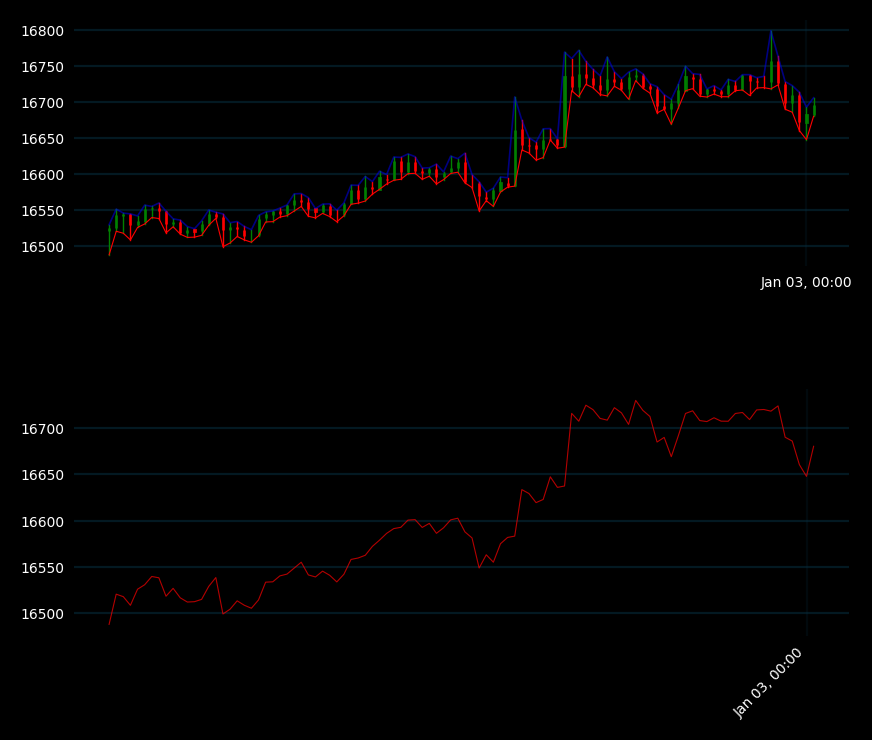

In [180]:
graphique([[data.low ,0.4, 'r', None], [data.high ,0.6, 'b', 0.5]],[[data.low ,0.4, 'r', 0.7]])